In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [5]:
def kernel_covariance(params, x, xp):
    
    v0 = params[0]
    alpha = params[1]
    d = params[2]
    
    # np.expand_dims(x, 1): create a row vector
    # np.expand_dims(xp, 0): create a column vector
    diffs = np.expand_dims(x, 1) - np.expand_dims(xp, 0)
    
    return v0 * np.exp( - np.power( np.sum(diffs**2, axis=2) / d**2, alpha/2.))

def plot_gp(ax,params,plot_xs,n_samples = 10,xlab=False,ylab=False):
    # size = number of samples to generate
    sampled_funcs = np.random.multivariate_normal(np.zeros(len(plot_xs)),\
                    kernel_covariance(params,plot_xs,plot_xs), size=4)
    
    ax.plot(plot_xs, sampled_funcs.T)
    ax.set_title(r'$\alpha = {},\/ d = {} $'.format(\
        params[1],params[2]),fontsize = 22)
    if xlab:
        ax.set_xlabel(r'$x$',fontsize = 20)
    if ylab:
        ax.set_ylabel(r'$f(x)$',fontsize = 20)

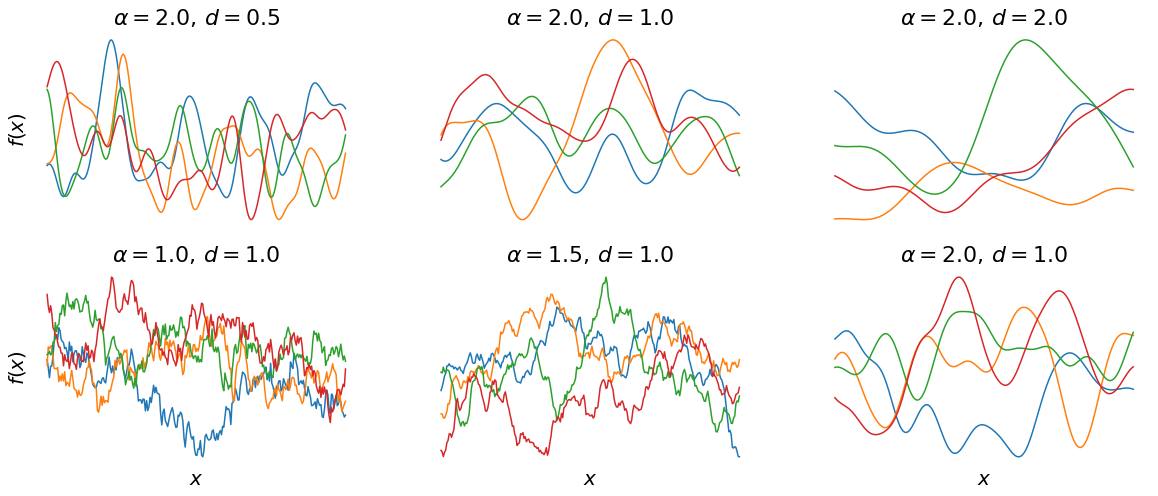

In [6]:
fig = plt.figure(figsize=(20,8), facecolor='white')

ax_1 = fig.add_subplot(231, frameon=False)
ax_2 = fig.add_subplot(232, frameon=False)
ax_3 = fig.add_subplot(233, frameon=False)
ax_4 = fig.add_subplot(234, frameon=False)
ax_5 = fig.add_subplot(235, frameon=False)
ax_6 = fig.add_subplot(236, frameon=False)

ax_1.set_xticks([])
ax_1.set_yticks([])
ax_2.set_xticks([])
ax_2.set_yticks([])
ax_3.set_xticks([])
ax_3.set_yticks([])
ax_4.set_xticks([])
ax_4.set_yticks([])
ax_5.set_xticks([])
ax_5.set_yticks([])
ax_6.set_xticks([])
ax_6.set_yticks([])

plot_xs = np.reshape(np.linspace(-5, 5, 256), (256,1))

# Arguments: v0, alpha, d
plot_gp(ax_1,np.array([1,2.,.5]),  plot_xs,ylab=True)
plot_gp(ax_2,np.array([1,2.,1.0]), plot_xs)
plot_gp(ax_3,np.array([1,2.,2.0]), plot_xs)
plot_gp(ax_4,np.array([1,1.,1]),   plot_xs,ylab=True,xlab=True)
plot_gp(ax_5,np.array([1,1.5,1]),  plot_xs,xlab=True)
plot_gp(ax_6,np.array([1,2.,1]),   plot_xs,xlab=True)